<a href="https://colab.research.google.com/github/freaksie/Neural-Networks/blob/master/stock_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* simple yahoo finance csv preprocessing , lstm , transformer     --challenge  
* crude oil prices,dow&jones , etc factors
* news extraction , processing , pipeline for sentiment score
transformer 
---
* one - model several stocks #not possible
* input 5 company all param     #output expected price    input=[1avg,1close,2avg,2close,]      output=[stk1 error,2]
---
# quantitive method approach
*   back to back training
*   single stock simple
*   input 5 company all param     #output 5 company ni expected price








# library inclusion

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.regularizers import L1L2

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
ds1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock_Pred/DataSet/SBIN.csv')
ds2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock_Pred/DataSet/SUNPHARMA.csv')
ds3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock_Pred/DataSet/TATASTEEL.csv')
ds4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock_Pred/DataSet/TCS.csv')
ds1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,0.1,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.720000e+13,NaN,NaN,NaN
1,04-01-2000,0.1,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130000e+14,NaN,NaN,NaN
2,05-01-2000,0.1,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.670000e+13,NaN,NaN,NaN
3,06-01-2000,0.1,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.750000e+14,NaN,NaN,NaN
4,07-01-2000,0.1,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.120000e+14,NaN,NaN,NaN


# SBIN

In [7]:
ds1.isnull().sum()  #shows the column with nos of null value.

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [8]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  # Fills the null data with the mean of that column.
# imputer = imputer.fit(ds1[['Trades']])
# ds1['Trades'] = imputer.transform(ds1[['Trades']])
# imputer = imputer.fit(ds1[['Deliverable Volume']])
# ds1['Deliverable Volume'] = imputer.transform(ds1[['Deliverable Volume']])
# imputer = imputer.fit(ds1[['%Deliverble']])
# ds1['%Deliverble'] = imputer.transform(ds1[['%Deliverble']])
# ds1.drop(["Series"],axis=1,inplace=True)


In [9]:
ds1.dropna(axis=1,inplace=True)
ds1.isnull().sum()

Date          0
Symbol        0
Series        0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64

In [10]:
ds1.drop(['Series','VWAP'],axis=1,inplace=True)
ds1.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,Volume,Turnover
0,03-01-2000,0.1,225.60,236.00,243.65,234.25,243.65,243.65,2373228,5.720000e+13
1,04-01-2000,0.1,243.65,243.65,262.00,238.85,258.00,259.10,4495741,1.130000e+14
2,05-01-2000,0.1,259.10,249.00,264.70,245.00,249.05,248.45,3434058,8.670000e+13
3,06-01-2000,0.1,248.45,252.00,268.00,252.00,260.50,261.00,6658801,1.750000e+14
4,07-01-2000,0.1,261.00,261.50,279.90,255.00,279.00,273.30,7873985,2.120000e+14


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec2f95b128>,
      dtype=object)

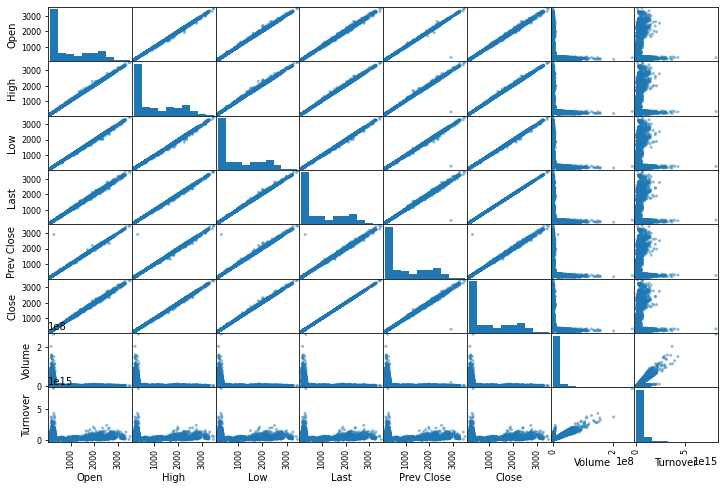

In [11]:
scatter_matrix(ds1[["Open","High","Low","Last","Prev Close","Close","Volume","Turnover"]],figsize=(12,8))

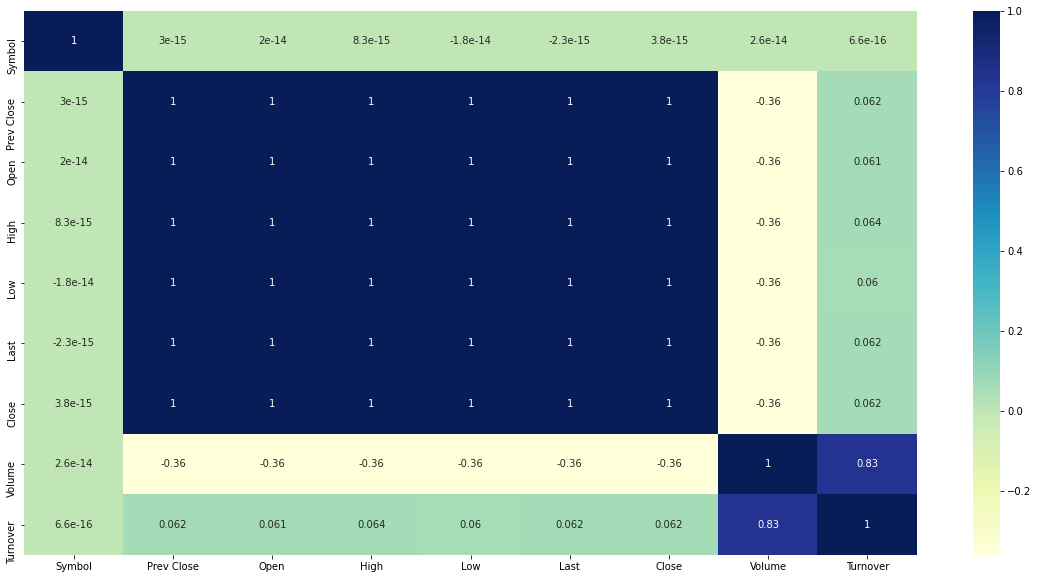

In [12]:
plt.rcParams['figure.figsize'] = (20, 10)
correlation = ds1.corr()
correlation_leads = correlation.index
sns.heatmap(ds1[correlation_leads].corr(),annot = True , cmap="YlGnBu")

In [13]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5204 non-null   object 
 1   Symbol      5204 non-null   float64
 2   Prev Close  5204 non-null   float64
 3   Open        5204 non-null   float64
 4   High        5204 non-null   float64
 5   Low         5204 non-null   float64
 6   Last        5204 non-null   float64
 7   Close       5204 non-null   float64
 8   Volume      5204 non-null   int64  
 9   Turnover    5204 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 406.7+ KB


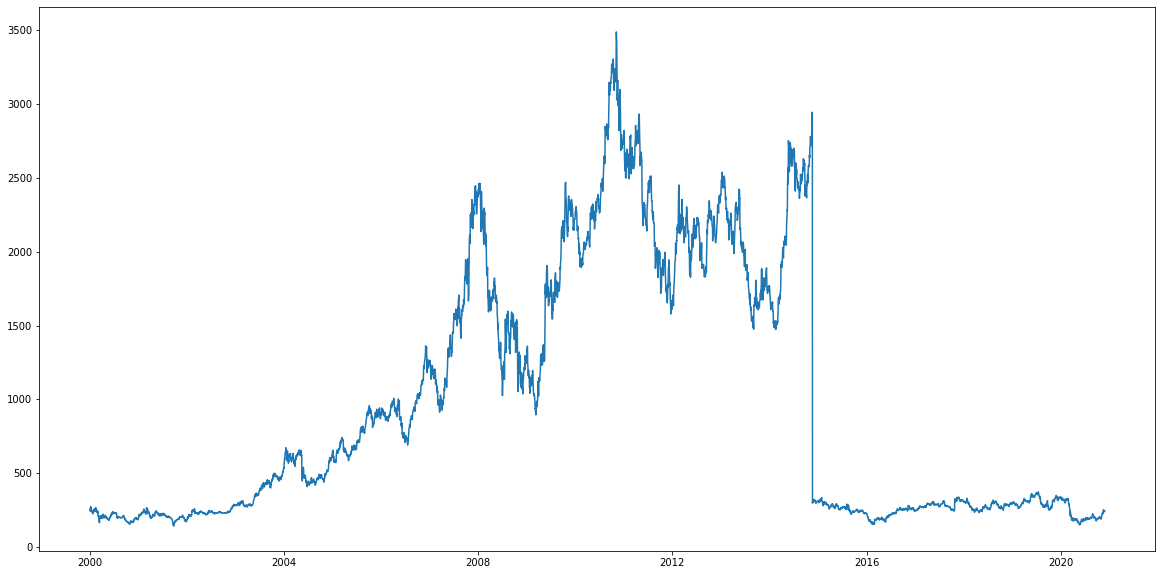

In [14]:
ds1['Date'] = pd.to_datetime(ds1.Date,format='%d-%m-%Y')
ds1.index = ds1['Date']

#plot
plt.figure(figsize=(20,10))
plt.plot(ds1['Close'], label='Close Price history')

<function matplotlib.pyplot.show>

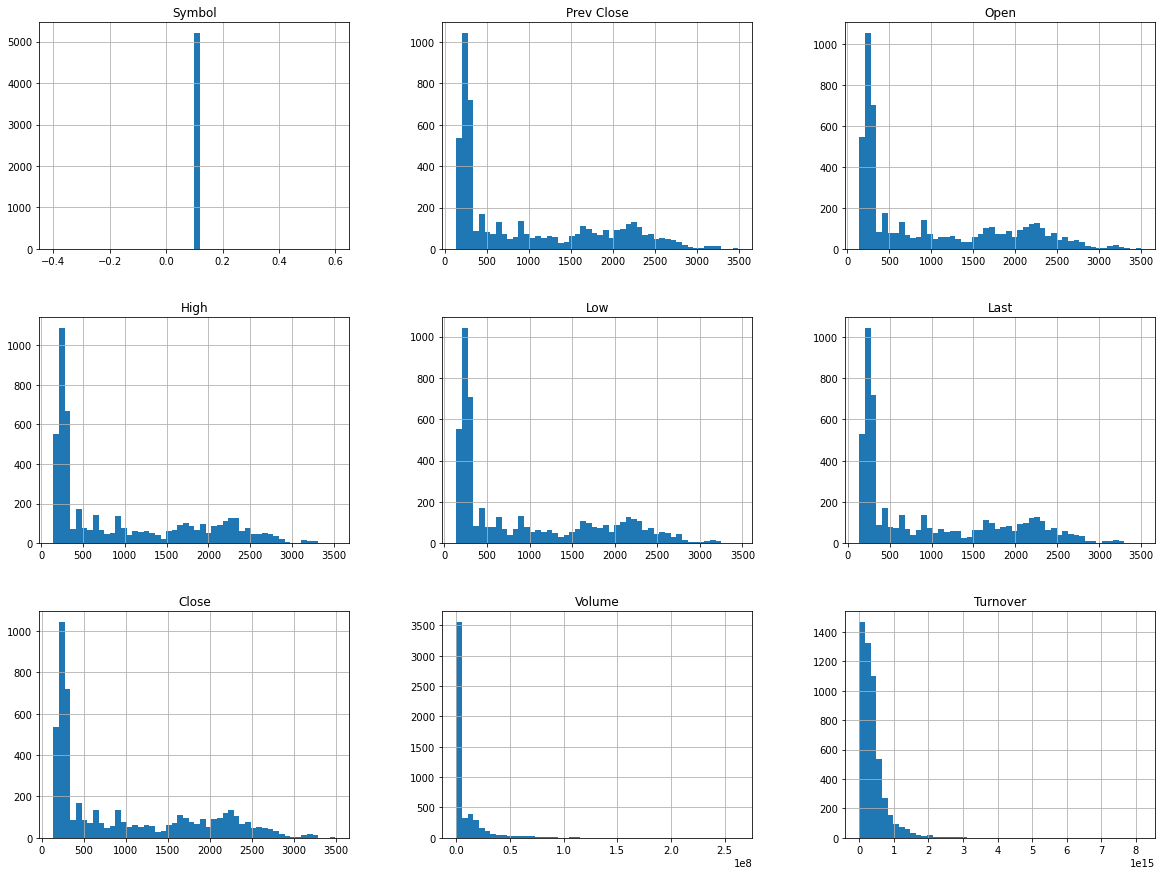

In [15]:
ds1.hist(bins=50, figsize=(20,15))
plt.show

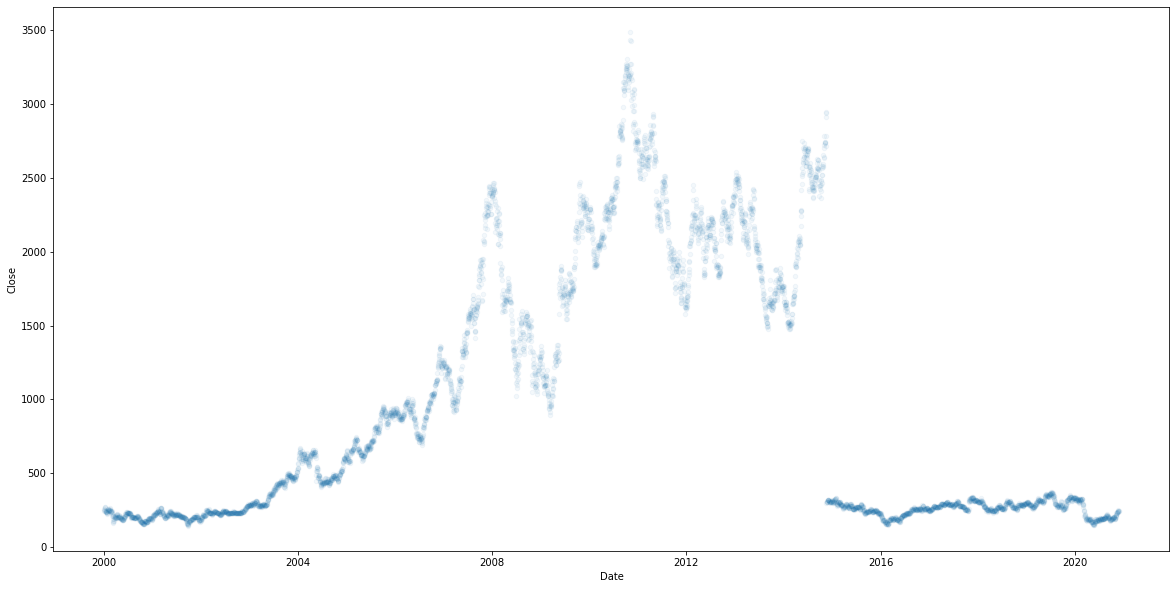

In [16]:
ds1.plot(kind="scatter", x="Date", y="Close" , alpha=0.05)

In [17]:
tmp = ds1[(ds1['Date']> "10-11-2014") & (ds1['Date']<"01-01-2016")]
tmp.head(365)

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,Volume,Turnover
Date,,,,,,,,,,
2014-10-13,2014-10-13,0.1,2451.20,2437.00,2494.40,2431.20,2483.00,2485.45,1392664,3.440000e+14
2014-10-14,2014-10-14,0.1,2485.45,2504.55,2544.00,2492.35,2535.60,2523.55,1731597,4.370000e+14
2014-10-16,2014-10-16,0.1,2523.55,2500.25,2554.80,2452.40,2475.00,2466.40,1907395,4.790000e+14
2014-10-17,2014-10-17,0.1,2466.40,2488.00,2534.95,2475.10,2526.25,2521.90,1463300,3.670000e+14
2014-10-20,2014-10-20,0.1,2521.90,2577.00,2593.75,2552.75,2568.00,2569.45,1882423,4.840000e+14
...,...,...,...,...,...,...,...,...,...,...
2015-12-24,2015-12-24,0.1,229.65,230.85,231.00,227.60,228.50,228.30,7257958,1.660000e+14
2015-12-28,2015-12-28,0.1,228.30,229.05,229.95,228.00,228.60,228.90,8756879,2.010000e+14
2015-12-29,2015-12-29,0.1,228.90,228.85,229.95,227.50,228.40,228.20,7263286,1.660000e+14


In 20 November, 2014. The stock split occured in SBIN company that led close price to drop from 2,910.00 to 297.10. hence its not a data void.

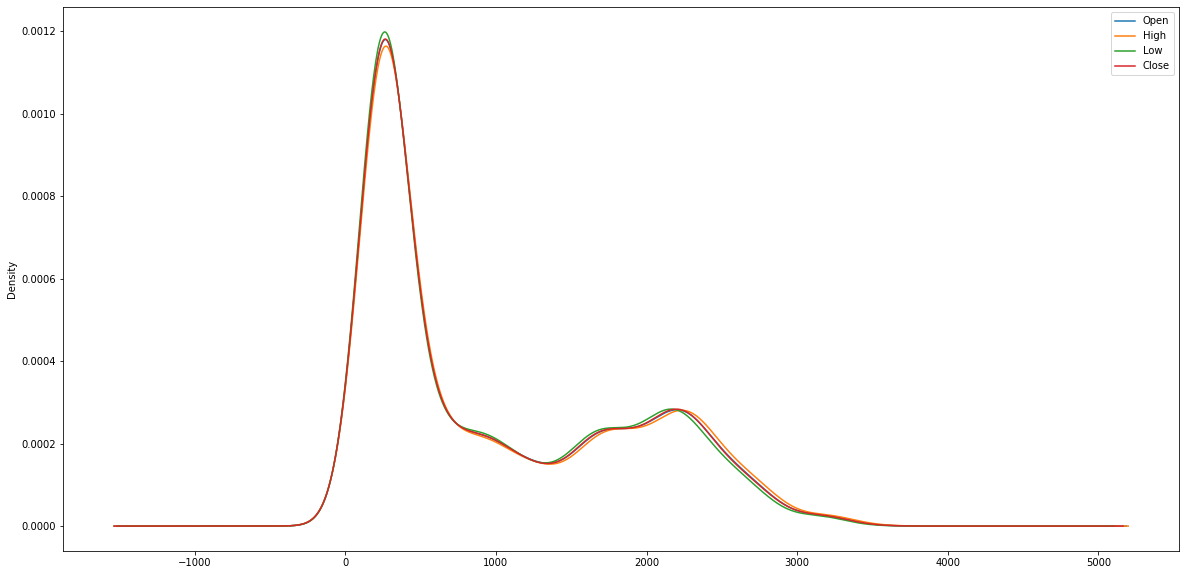

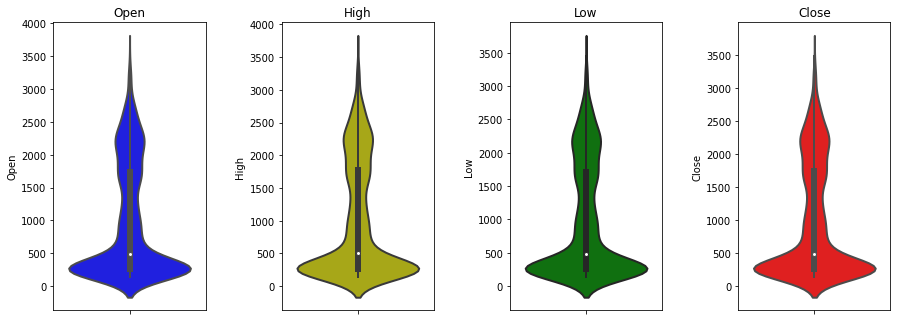

In [18]:
ds1[['Open','High','Low','Close']].plot.density()
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(141)
plt.title('Open')
sns.violinplot(y = 'Open' , data = ds1 , color = 'b' , linewidth = 2)

plt.subplot(142)
plt.title('High')
sns.violinplot(y = 'High' , data = ds1 , color = 'y' , linewidth = 2)

plt.subplot(143)
plt.title('Low')
sns.violinplot(y = 'Low' , data = ds1 , color = 'g' , linewidth = 2)

plt.subplot(144)
plt.title('Close')
sns.violinplot(y = 'Close' , data = ds1 , color = 'r' , linewidth = 2)

plt.show()

In [19]:
normalizer = preprocessing.MinMaxScaler((0,1))
df_exclude_strings = ds1.select_dtypes(include = [np.number])
sym=ds1[['Symbol']]
df_exclude_strings = normalizer.fit_transform(df_exclude_strings[['Prev Close','Open','High','Low','Last','Close','Volume','Turnover']] )
normalized_ds1 = pd.DataFrame(np.hstack((sym,df_exclude_strings))) 
normalized_ds1.head()

,0,1,2,3,4,5,6,7,8
0,0.1,0.025131,0.027705,0.028423,0.028448,0.030699,0.030521,0.009021,0.007000
1,0.1,0.030521,0.029981,0.033872,0.029837,0.034971,0.035135,0.017101,0.013839
2,0.1,0.035135,0.031572,0.034674,0.031695,0.032307,0.031955,0.013060,0.010616
3,0.1,0.031955,0.032464,0.035654,0.033808,0.035716,0.035703,0.025336,0.021437
4,0.1,0.035703,0.035290,0.039189,0.034714,0.041224,0.039376,0.029962,0.025971


# SUN-PHARMA

In [20]:
ds2.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,0.2,EQ,1699.10,1800.0,1835.05,1760.0,1835.05,1835.05,1825.90,3024,5.520000e+11,NaN,NaN,NaN
1,04-01-2000,0.2,EQ,1835.05,1960.0,1960.00,1763.0,1811.50,1810.45,1805.97,5787,1.050000e+12,NaN,NaN,NaN
2,05-01-2000,0.2,EQ,1810.45,1845.0,1845.00,1740.0,1745.00,1746.90,1766.69,6105,1.080000e+12,NaN,NaN,NaN
3,06-01-2000,0.2,EQ,1746.90,1750.0,1795.00,1735.0,1748.00,1745.20,1749.32,3472,6.070000e+11,NaN,NaN,NaN
4,07-01-2000,0.2,EQ,1745.20,1705.0,1705.00,1605.6,1605.60,1605.60,1621.51,4125,6.690000e+11,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec23b2de10>,
      dtype=object)

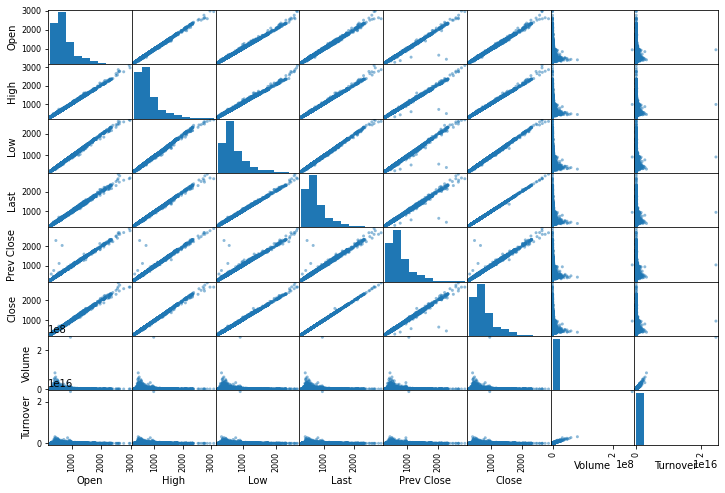

In [21]:
ds2.dropna(axis=1,inplace=True)
ds2.drop(['Series','VWAP'],axis=1,inplace=True)

scatter_matrix(ds2[["Open","High","Low","Last","Prev Close","Close","Volume","Turnover"]],figsize=(12,8))


In [22]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5204 non-null   object 
 1   Symbol      5204 non-null   float64
 2   Prev Close  5204 non-null   float64
 3   Open        5204 non-null   float64
 4   High        5204 non-null   float64
 5   Low         5204 non-null   float64
 6   Last        5204 non-null   float64
 7   Close       5204 non-null   float64
 8   Volume      5204 non-null   int64  
 9   Turnover    5204 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 406.7+ KB


<function matplotlib.pyplot.show>

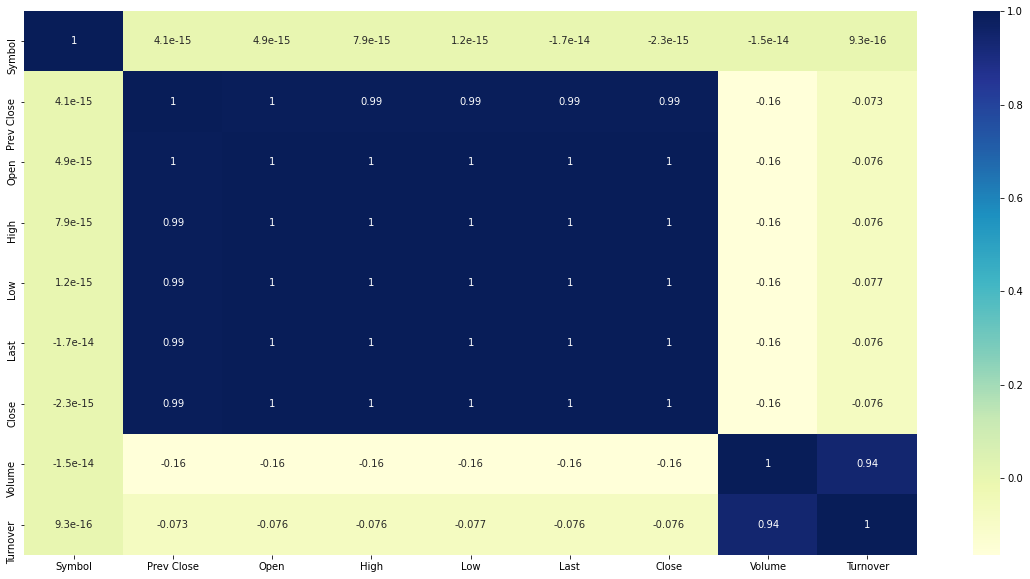

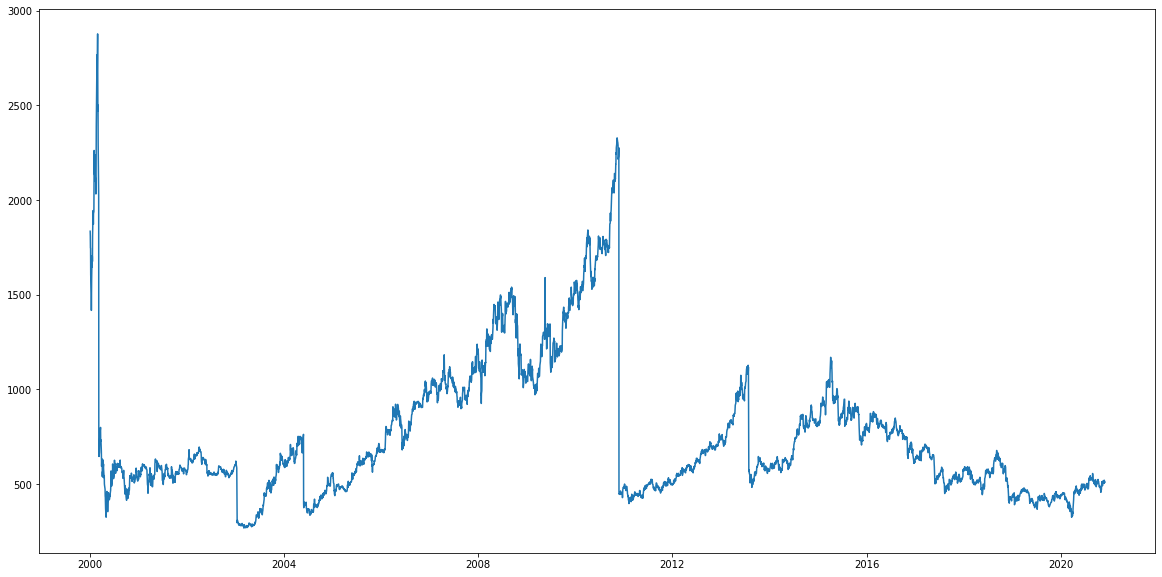

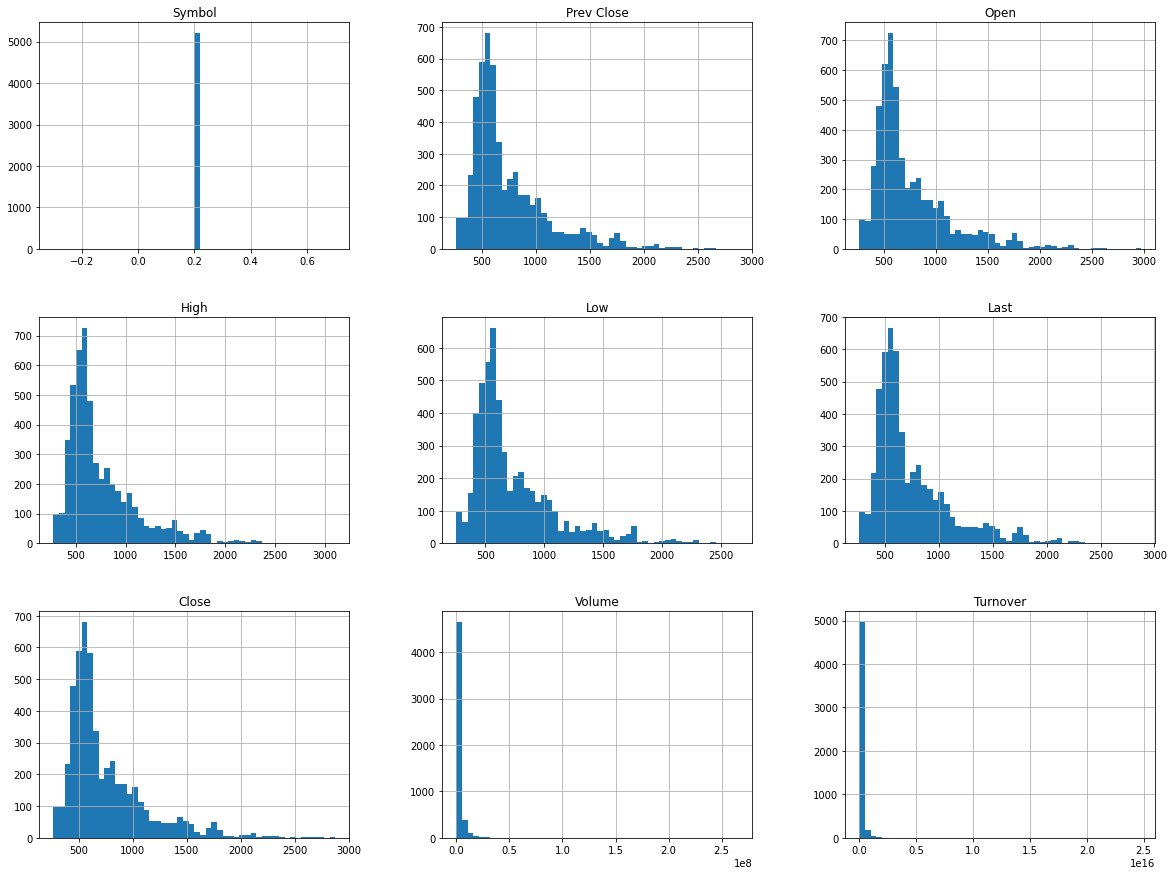

In [23]:
plt.rcParams['figure.figsize'] = (20, 10)
correlation = ds2.corr()
correlation_leads = correlation.index
sns.heatmap(ds2[correlation_leads].corr(),annot = True , cmap="YlGnBu")


ds2['Date'] = pd.to_datetime(ds2.Date,format='%d-%m-%Y')
ds2.index = ds2['Date']
plt.figure(figsize=(20,10))
plt.plot(ds2['Close'], label='Close Price history')


ds2.hist(bins=50, figsize=(20,15))
plt.show

In [24]:
normalizer = preprocessing.MinMaxScaler((0,1))
df_exclude_strings = ds2.select_dtypes(include = [np.number])
sym=ds2[['Symbol']]
df_exclude_strings = normalizer.fit_transform(df_exclude_strings[['Prev Close','Open','High','Low','Last','Close','Volume','Turnover']] )
normalized_ds2 = pd.DataFrame(np.hstack((sym,df_exclude_strings))) 
normalized_ds2.head()

,0,1,2,3,4,5,6,7,8
0,0.2,0.548628,0.566261,0.550865,0.629026,0.601053,0.600724,0.000010,0.000022
1,0.2,0.600724,0.625323,0.594986,0.630280,0.592038,0.591298,0.000021,0.000042
2,0.2,0.591298,0.582872,0.554379,0.620661,0.566581,0.566945,0.000022,0.000043
3,0.2,0.566945,0.547804,0.536723,0.618570,0.567729,0.566294,0.000012,0.000024
4,0.2,0.566294,0.531192,0.504944,0.564450,0.513217,0.512799,0.000015,0.000026


# TATA-STEEL

In [25]:
ds3.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,0.3,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.020000e+13,NaN,NaN,NaN
1,04-01-2000,0.3,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.350000e+13,NaN,NaN,NaN
2,05-01-2000,0.3,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.020000e+13,NaN,NaN,NaN
3,06-01-2000,0.3,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.290000e+13,NaN,NaN,NaN
4,07-01-2000,0.3,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.330000e+13,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec20f40ac8>,
      dtype=object)

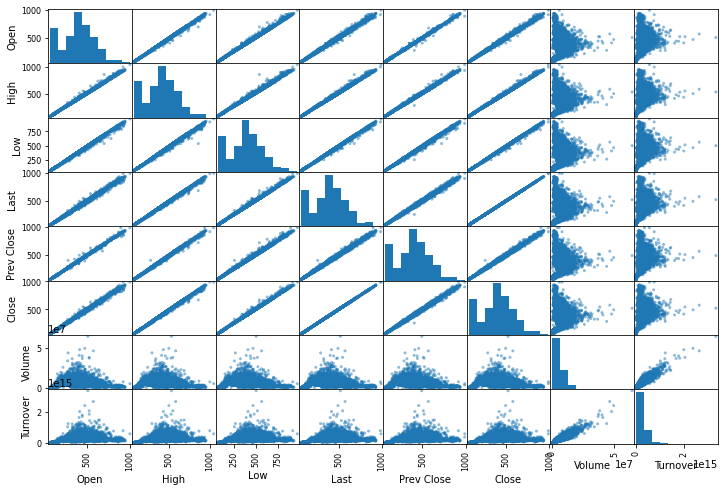

In [26]:
ds3.dropna(axis=1,inplace=True)
ds3.drop(['Series','VWAP'],axis=1,inplace=True)

scatter_matrix(ds3[["Open","High","Low","Last","Prev Close","Close","Volume","Turnover"]],figsize=(12,8))


In [27]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5204 non-null   object 
 1   Symbol      5204 non-null   float64
 2   Prev Close  5204 non-null   float64
 3   Open        5204 non-null   float64
 4   High        5204 non-null   float64
 5   Low         5204 non-null   float64
 6   Last        5204 non-null   float64
 7   Close       5204 non-null   float64
 8   Volume      5204 non-null   int64  
 9   Turnover    5204 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 406.7+ KB


<function matplotlib.pyplot.show>

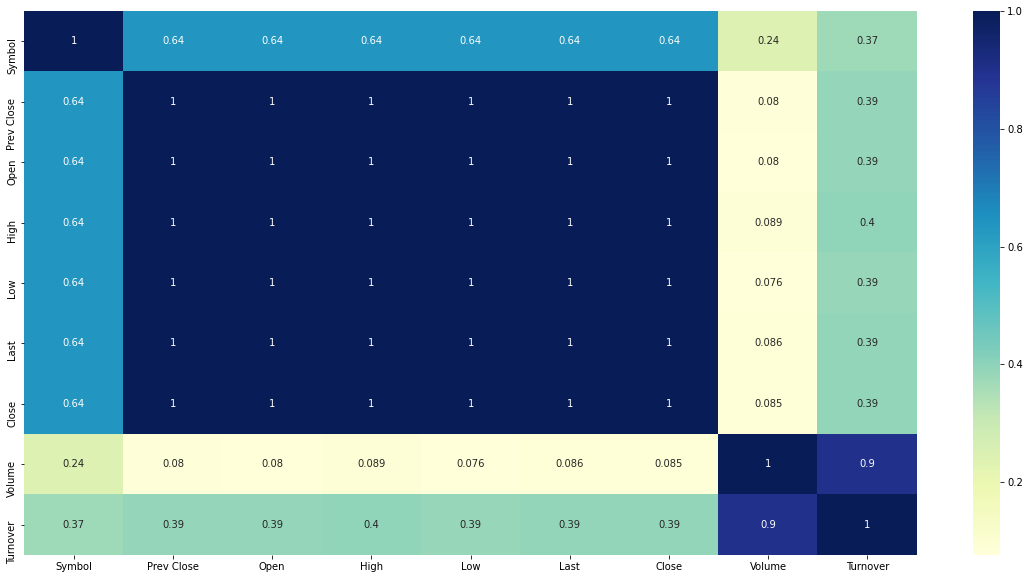

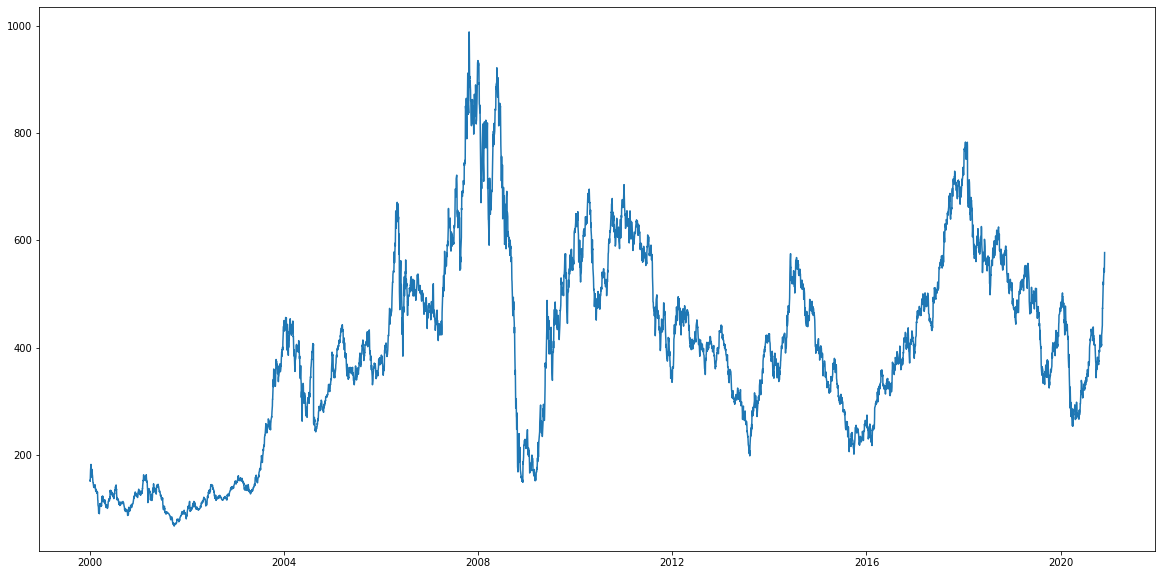

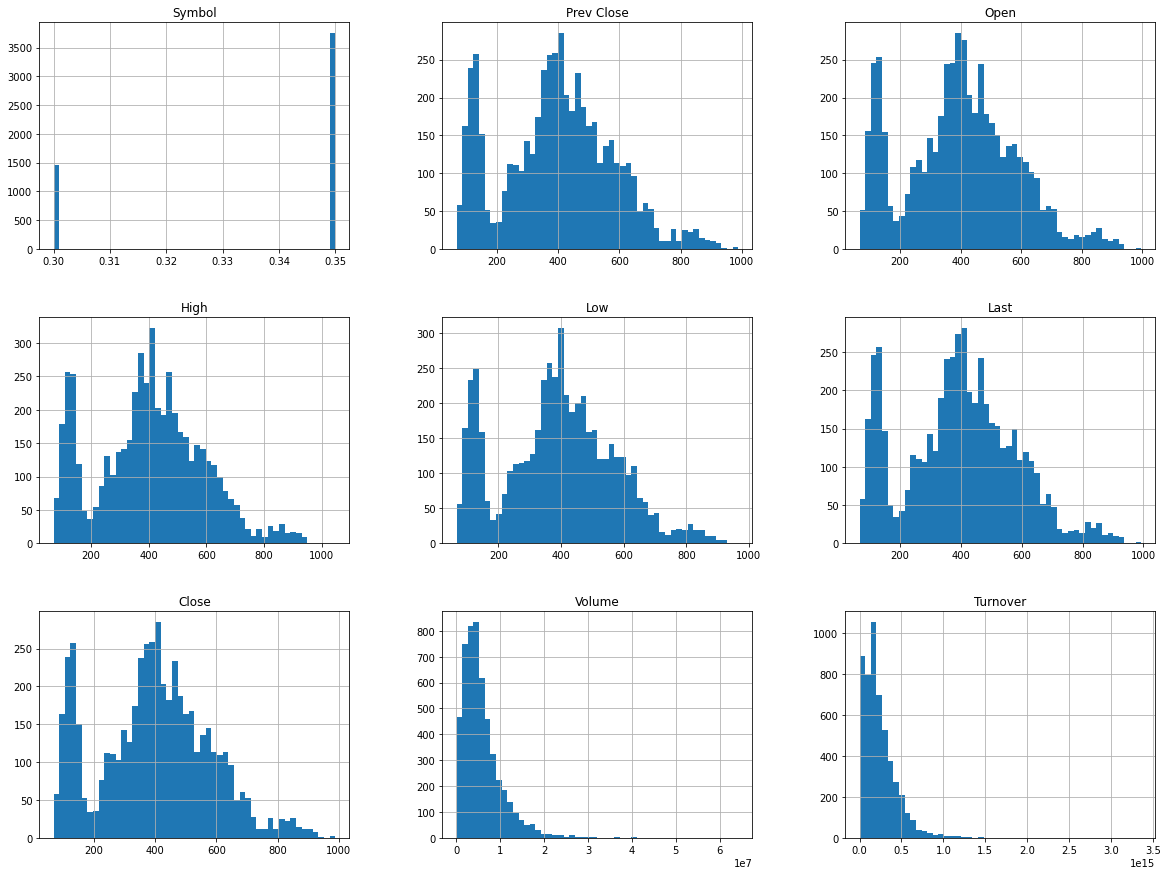

In [28]:
plt.rcParams['figure.figsize'] = (20, 10)
correlation = ds3.corr()
correlation_leads = correlation.index
sns.heatmap(ds3[correlation_leads].corr(),annot = True , cmap="YlGnBu")


ds3['Date'] = pd.to_datetime(ds3.Date,format='%d-%m-%Y')
ds3.index = ds3['Date']
plt.figure(figsize=(20,10))
plt.plot(ds3['Close'], label='Close Price history')


ds3.hist(bins=50, figsize=(20,15))
plt.show

In [29]:
normalizer = preprocessing.MinMaxScaler((0,1))
df_exclude_strings = ds3.select_dtypes(include = [np.number])
sym=ds3[['Symbol']]
df_exclude_strings = normalizer.fit_transform(df_exclude_strings[['Prev Close','Open','High','Low','Last','Close','Volume','Turnover']] )
normalized_ds3 = pd.DataFrame(np.hstack((sym,df_exclude_strings))) 
normalized_ds3.head()

,0,1,2,3,4,5,6,7,8
0,0.3,0.081484,0.088049,0.085352,0.088975,0.092038,0.092443,0.030810,0.008924
1,0.3,0.092443,0.090304,0.085148,0.085587,0.091444,0.090653,0.023838,0.006930
2,0.3,0.090653,0.084398,0.095267,0.087309,0.097980,0.096891,0.059398,0.017854
3,0.3,0.096891,0.099807,0.101605,0.103249,0.109863,0.109586,0.039482,0.012704
4,0.3,0.109586,0.115323,0.111724,0.111413,0.111537,0.113601,0.056308,0.018776


# TCS

In [30]:
ds4.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,25-08-2004,0.4,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.730000e+15,NaN,5206360,0.3042
1,26-08-2004,0.4,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.980000e+14,NaN,1294899,0.2561
2,27-08-2004,0.4,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.720000e+14,NaN,976527,0.2549
3,30-08-2004,0.4,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.010000e+14,NaN,701664,0.2294
4,31-08-2004,0.4,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.600000e+14,NaN,695234,0.2624


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec1f472e80>,
      dtype=object)

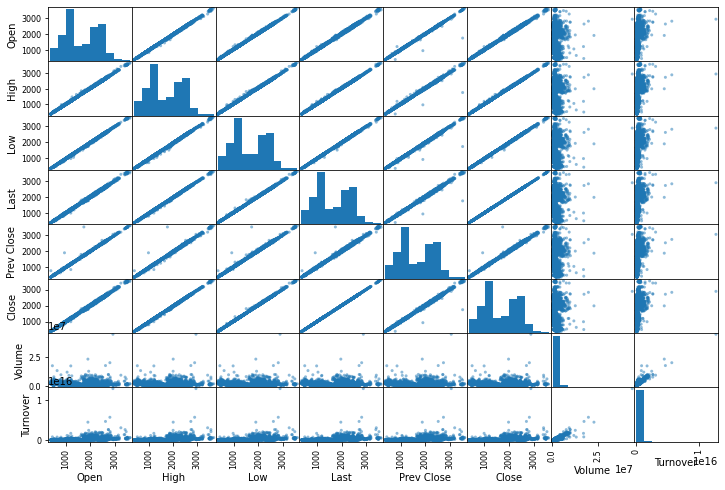

In [31]:
ds4.drop(['Series','VWAP','Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)

scatter_matrix(ds4[["Open","High","Low","Last","Prev Close","Close","Volume","Turnover"]],figsize=(12,8))

In [32]:
ds4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4037 non-null   object 
 1   Symbol      4037 non-null   float64
 2   Prev Close  4037 non-null   float64
 3   Open        4037 non-null   float64
 4   High        4037 non-null   float64
 5   Low         4037 non-null   float64
 6   Last        4037 non-null   float64
 7   Close       4037 non-null   float64
 8   Volume      4037 non-null   int64  
 9   Turnover    4037 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 315.5+ KB


<function matplotlib.pyplot.show>

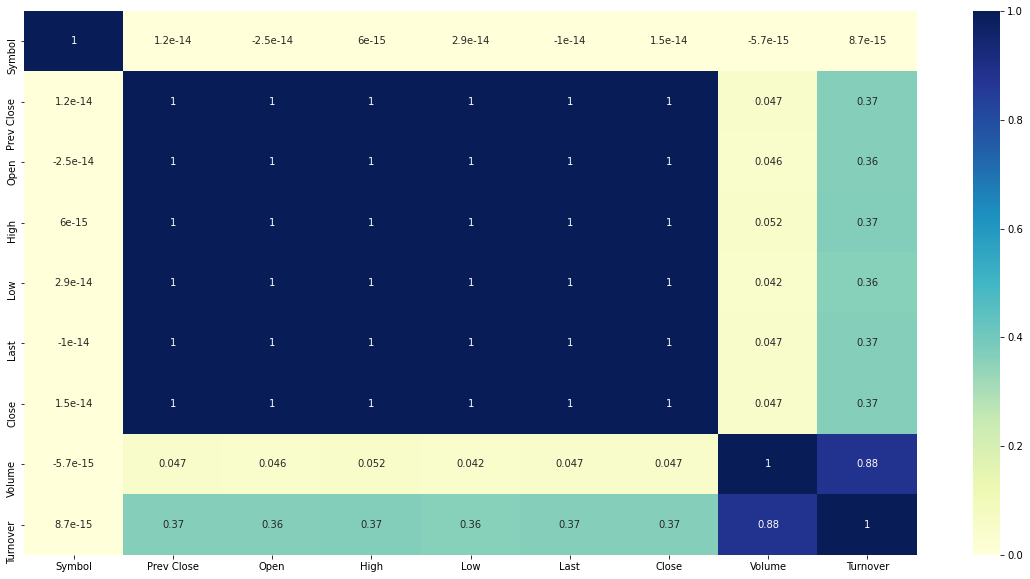

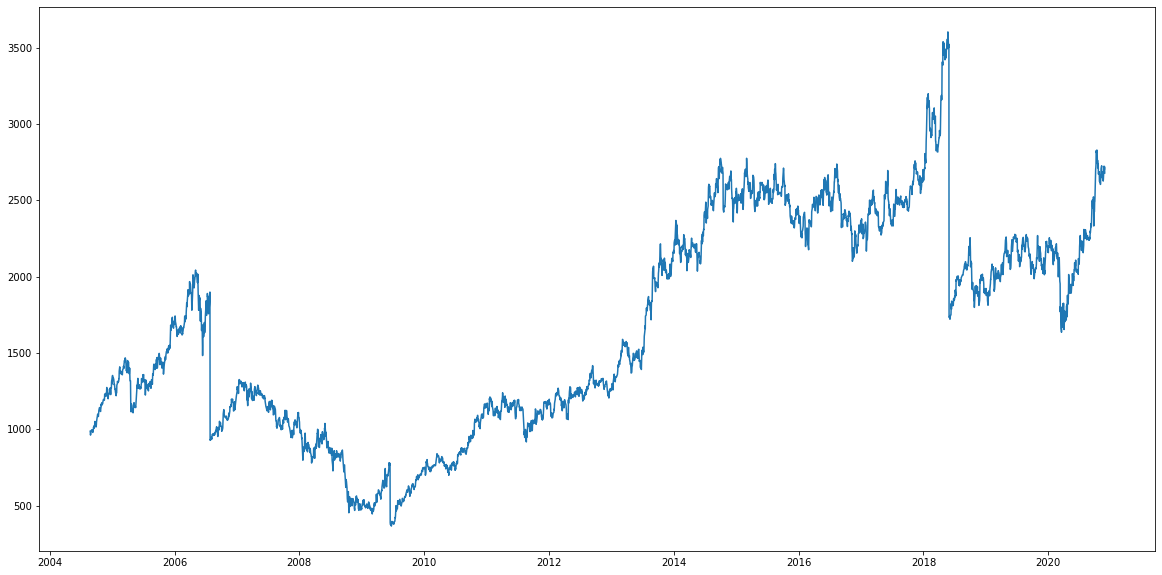

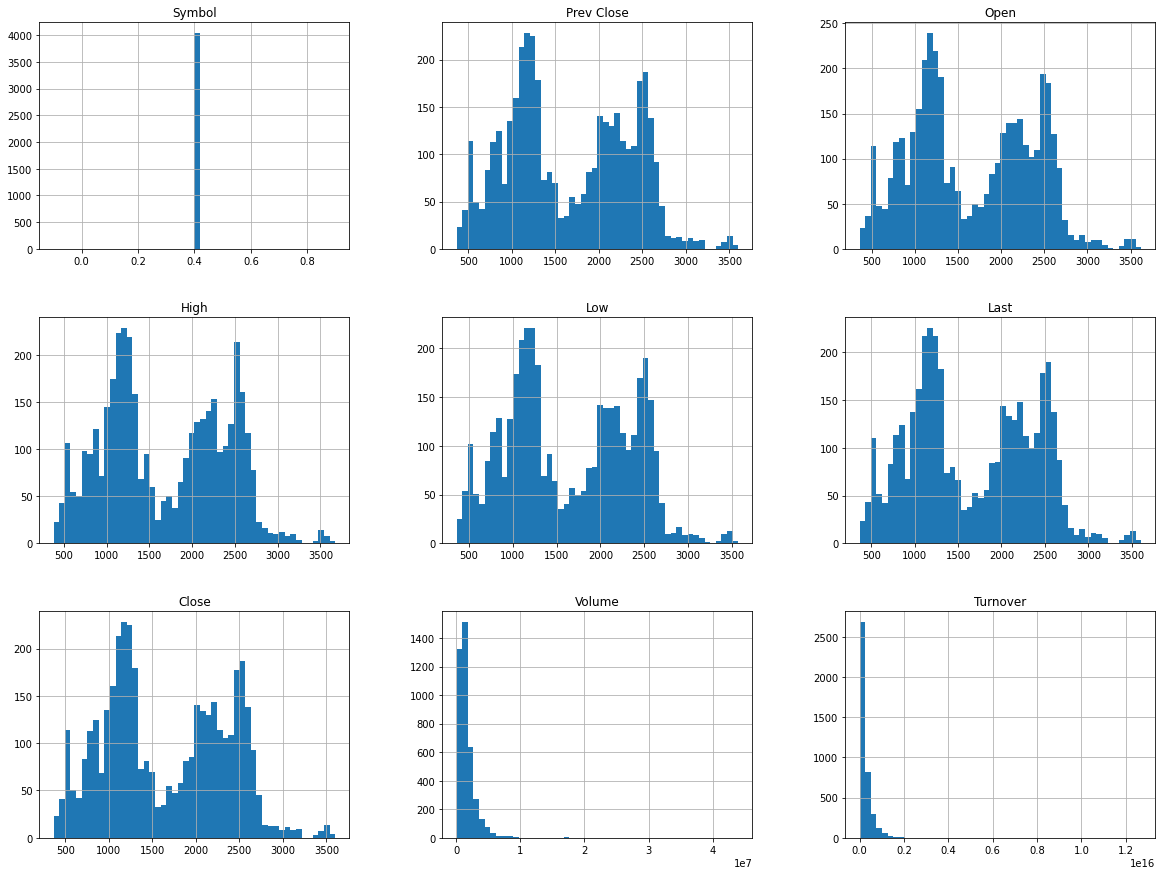

In [33]:
plt.rcParams['figure.figsize'] = (20, 10)
correlation = ds4.corr()
correlation_leads = correlation.index
sns.heatmap(ds4[correlation_leads].corr(),annot = True , cmap="YlGnBu")


ds4['Date'] = pd.to_datetime(ds4.Date,format='%d-%m-%Y')
ds4.index = ds4['Date']
plt.figure(figsize=(20,10))
plt.plot(ds4['Close'], label='Close Price history')


ds4.hist(bins=50, figsize=(20,15))
plt.show

In [34]:
normalizer = preprocessing.MinMaxScaler((0,1))
df_exclude_strings = ds4.select_dtypes(include = [np.number])
sym=ds4[['Symbol']]
df_exclude_strings = normalizer.fit_transform(df_exclude_strings[['Prev Close','Open','High','Low','Last','Close','Volume','Turnover']] )
normalized_ds4 = pd.DataFrame(np.hstack((sym,df_exclude_strings))) 
normalized_ds4.head()

,0,1,2,3,4,5,6,7,8
0,0.4,0.149318,0.256876,0.248995,0.193184,0.190845,0.191934,0.388457,0.136127
1,0.4,0.191934,0.193568,0.187819,0.192033,0.188333,0.189169,0.114439,0.039109
2,0.4,0.189169,0.190628,0.183391,0.186822,0.183510,0.184118,0.086616,0.029187
3,0.4,0.184118,0.186799,0.185696,0.188829,0.191276,0.191563,0.069063,0.023595
4,0.4,0.191563,0.191884,0.185696,0.192251,0.191707,0.191980,0.059774,0.020367


# Data Handling

In [35]:
df = {}
df[0]=normalized_ds1
df[1]=normalized_ds2
df[2]=normalized_ds3
df[3]=normalized_ds4

In [36]:
train_per = 0.7
def split(dataframe, border,):
    return dataframe.loc[:border], dataframe.loc[border:]

df_ = {}
for i in range(4):
  n = df[i].shape[0]
  df_[i] = {}
  df_[i]["Train"], df_[i]["Test"] = split(df[i], n*train_per)


In [37]:
df_[0]["Train"].head()

,0,1,2,3,4,5,6,7,8
0,0.1,0.025131,0.027705,0.028423,0.028448,0.030699,0.030521,0.009021,0.007000
1,0.1,0.030521,0.029981,0.033872,0.029837,0.034971,0.035135,0.017101,0.013839
2,0.1,0.035135,0.031572,0.034674,0.031695,0.032307,0.031955,0.013060,0.010616
3,0.1,0.031955,0.032464,0.035654,0.033808,0.035716,0.035703,0.025336,0.021437
4,0.1,0.035703,0.035290,0.039189,0.034714,0.041224,0.039376,0.029962,0.025971


In [38]:
x_train={}
x_test={}
y_train={}
y_test={}
for i in range(4):
  x_train[i]=df_[i]["Train"].iloc[:,[0,1,2,3,4,5,6,7,8]]
  y_train[i]=df_[i]["Train"].iloc[:,[6]]
  x_test[i]=df_[i]["Test"].iloc[:,[0,1,2,3,4,5,6,7,8]]
  y_test[i]=df_[i]["Test"].iloc[:,[6]]

In [39]:
y_test_temp=[]
y_train_temp=[]
for i in range(4):
  temp=list(y_test[i][6])
  temp1=list(y_train[i][6])
  y_train_temp.append(temp1)
  y_test_temp.append(temp)
y_test=y_test_temp
y_train=y_train_temp

In [40]:
X_TRAIN=[]
Y_TRAIN=[]
X_TEST=[]
Y_TEST=[]
for i in range(4):
  training_list=[]
  batch=x_train[i].shape[0]-30
  for j in range(batch):
    training_list.append(x_train[i][j:j+30])
  training_np_array=np.array(training_list)
  X_TRAIN.append(training_np_array)
  
  
  Y_TRAIN.append(y_train[i][30:])
  Y_TRAIN[i]=np.array(Y_TRAIN[i])
  testing_list=[]
  batch=x_test[i].shape[0]-30
  for j in range(batch):
    testing_list.append(x_test[i][j:j+30])
  testing_np_array=np.array(testing_list)
  X_TEST.append(testing_np_array)
  
  
  Y_TEST.append(y_test[i][30:])
  Y_TEST[i]=np.array(Y_TEST[i])

In [41]:
for i in range(4):
  print(X_TRAIN[i].shape)
  print(Y_TRAIN[i].shape)
  print(X_TEST[i].shape)
  print(Y_TEST[i].shape)

(3613, 30, 9)
(3613,)
(1531, 30, 9)
(1531,)
(3613, 30, 9)
(3613,)
(1531, 30, 9)
(1531,)
(3613, 30, 9)
(3613,)
(1531, 30, 9)
(1531,)
(2796, 30, 9)
(2796,)
(1181, 30, 9)
(1181,)


# Model Building

In [43]:
features = 9
#Implementing LSTM
model = keras.models.Sequential()         #initializing network

#input layer
hidden_layer_units = 10
model.add(keras.layers.LSTM(hidden_layer_units,kernel_regularizer=L1L2(0.0001), return_sequences=True, input_shape=(30,features)))

#LSTM layer 2
hidden_layer_units = 10
model.add(keras.layers.LSTM(hidden_layer_units,kernel_regularizer=L1L2(0.0001)))

#Output layer
output_layer_units = 1     #just need the close value
model.add(keras.layers.Dense(output_layer_units))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

for i in range(4):
    print("Fitting to", i)
    model.fit(X_TRAIN[i], Y_TRAIN[i], epochs=20, batch_size=10)

Fitting to 0
Epoch 1/20
362/362 [==============================] - 8s 13ms/step - loss: 0.0234
Epoch 2/20
362/362 [==============================] - 5s 13ms/step - loss: 0.0078
Epoch 3/20
362/362 [==============================] - 5s 13ms/step - loss: 0.0050
Epoch 4/20
362/362 [==============================] - 5s 13ms/step - loss: 0.0037
Epoch 5/20
362/362 [==============================] - 5s 13ms/step - loss: 0.0029
Epoch 6/20
362/362 [==============================] - 5s 13ms/step - loss: 0.0024
Epoch 7/20
362/362 [==============================] - 5s 13ms/step - loss: 0.0020
Epoch 8/20
362/362 [==============================] - 5s 13ms/step - loss: 0.0017
Epoch 9/20
362/362 [==============================] - 5s 13ms/step - loss: 0.0016
Epoch 10/20
362/362 [==============================] - 5s 13ms/step - loss: 0.0014
Epoch 11/20
362/362 [==============================] - 5s 13ms/step - loss: 0.0013
Epoch 12/20
362/362 [==============================] - 5s 13ms/step - loss: 0.0013


In [61]:
real_close_value_train=[]
real_close_value_test=[]
real_close_value_train.append( normalized_ds1.iloc[ 30:int((normalized_ds1.shape[0] )*train_per)+1 , 6:7].values )
real_close_value_train.append( normalized_ds2.iloc[ 30:int((normalized_ds2.shape[0] )*train_per)+1 , 6:7].values )
real_close_value_train.append( normalized_ds3.iloc[ 30:int((normalized_ds3.shape[0] )*train_per)+1 , 6:7].values )
real_close_value_train.append( normalized_ds4.iloc[ 30:int((normalized_ds4.shape[0] )*train_per)+1 , 6:7].values )
real_close_value_test.append(normalized_ds1.iloc[ int(normalized_ds1.shape[0]*0.7)+31: , 6:7].values)
real_close_value_test.append(normalized_ds2.iloc[ int(normalized_ds2.shape[0]*0.7)+31: , 6:7].values)
real_close_value_test.append(normalized_ds3.iloc[ int(normalized_ds3.shape[0]*0.7)+31: , 6:7].values)
real_close_value_test.append(normalized_ds4.iloc[ int(normalized_ds4.shape[0]*0.7)+31: , 6:7].values)
predicted_close_value_train=[]
predicted_close_value_test=[]
for i in range(4):
  print(real_close_value_test[i].shape)
  predicted_close_value_train.append(model.predict(X_TRAIN[i]))
  predicted_close_value_test.append(model.predict(X_TEST[i]))

(1531, 1)
(1531, 1)
(1531, 1)
(1181, 1)


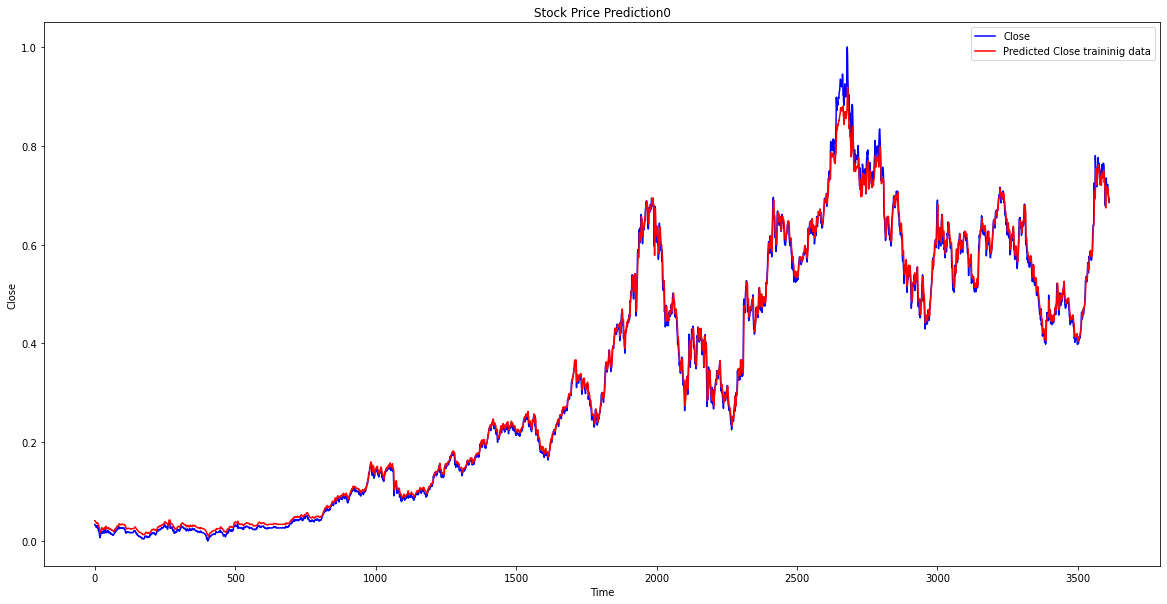

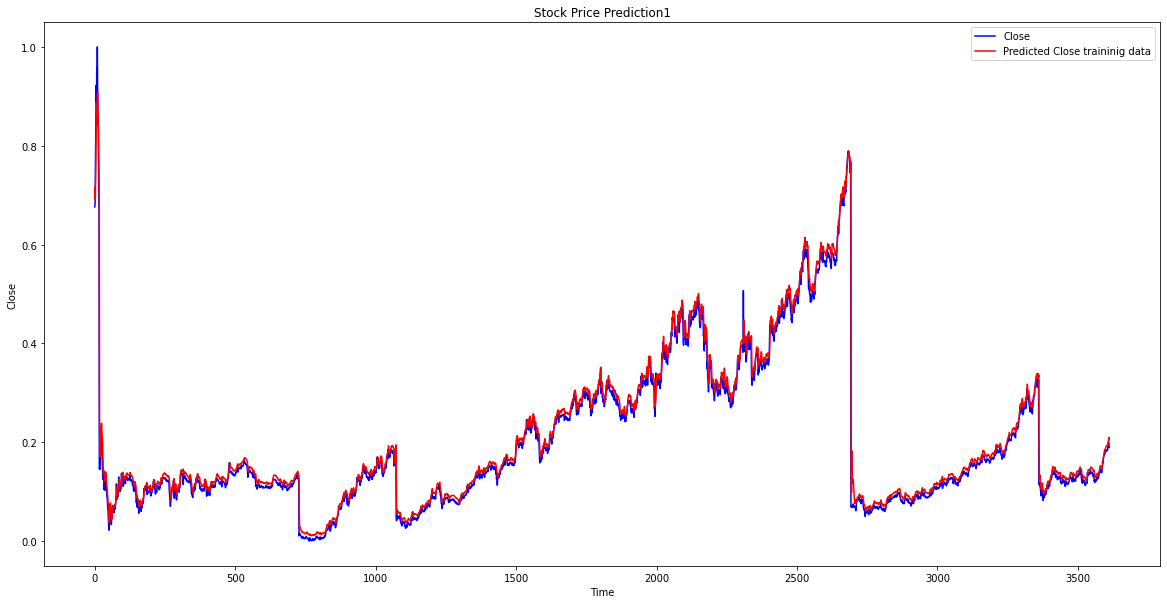

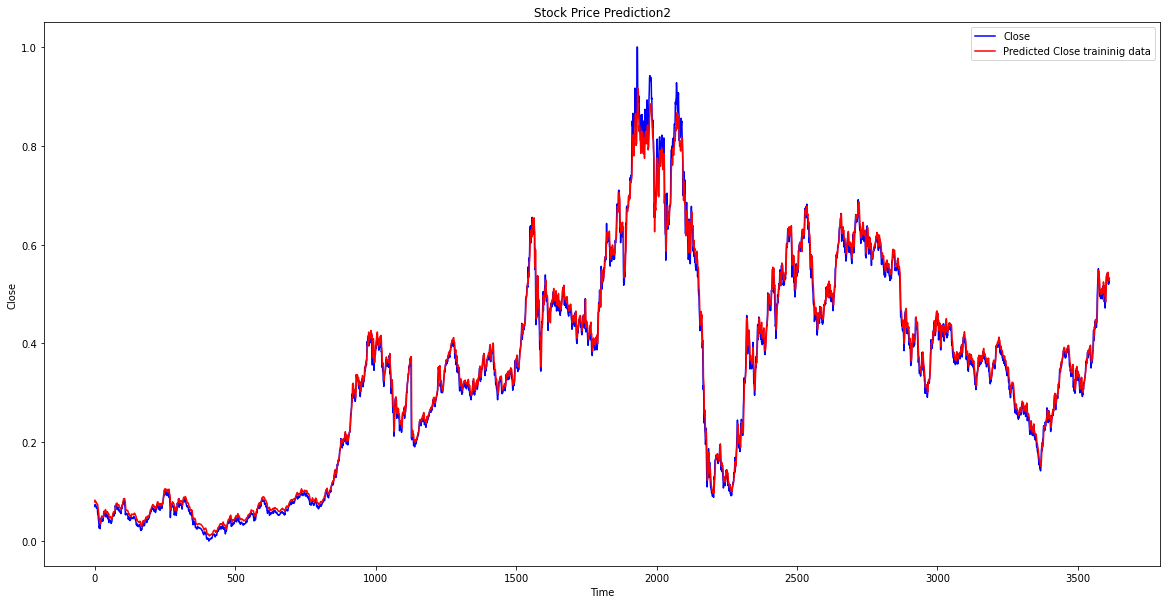

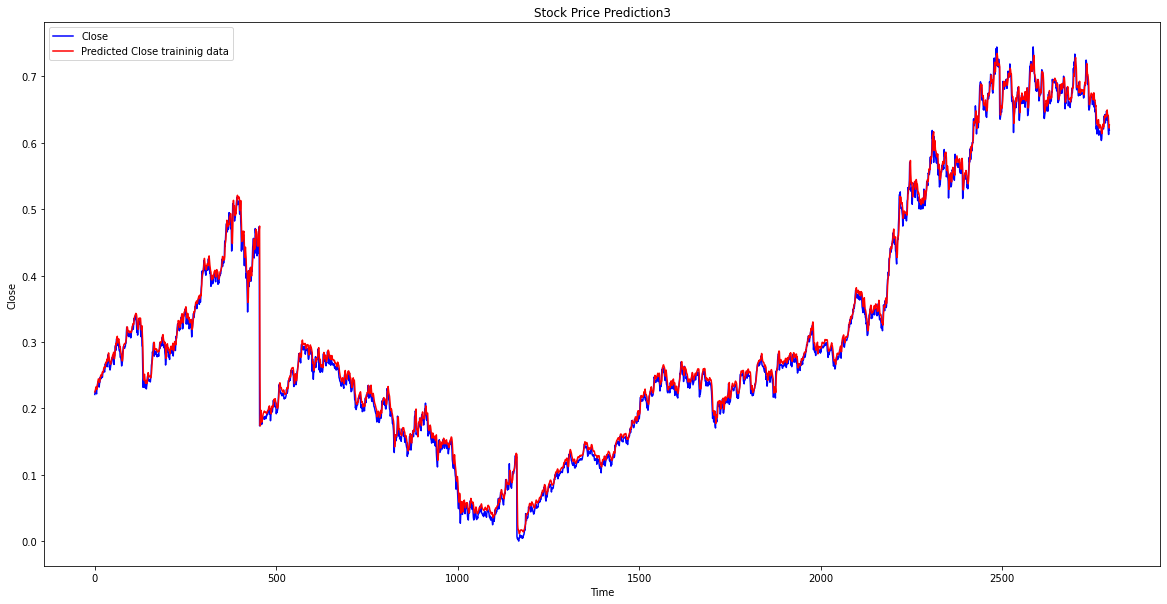

In [57]:
for i in range(4):
  plt.plot(real_close_value_train[i], color = 'blue', label = 'Close')
  plt.plot(predicted_close_value_train[i],  color = 'red', label = 'Predicted Close traininig data')
  # print("train accuracy: {} %".format(100 - np.mean((np.abs(predicted_close_value_train[i] - real_close_value_train[i]))/real_close_value_train[i])*100))   
  plt.title('Stock Price Prediction'+str(i))
  plt.xlabel('Time')
  plt.ylabel('Close')
  plt.legend()
  plt.show()

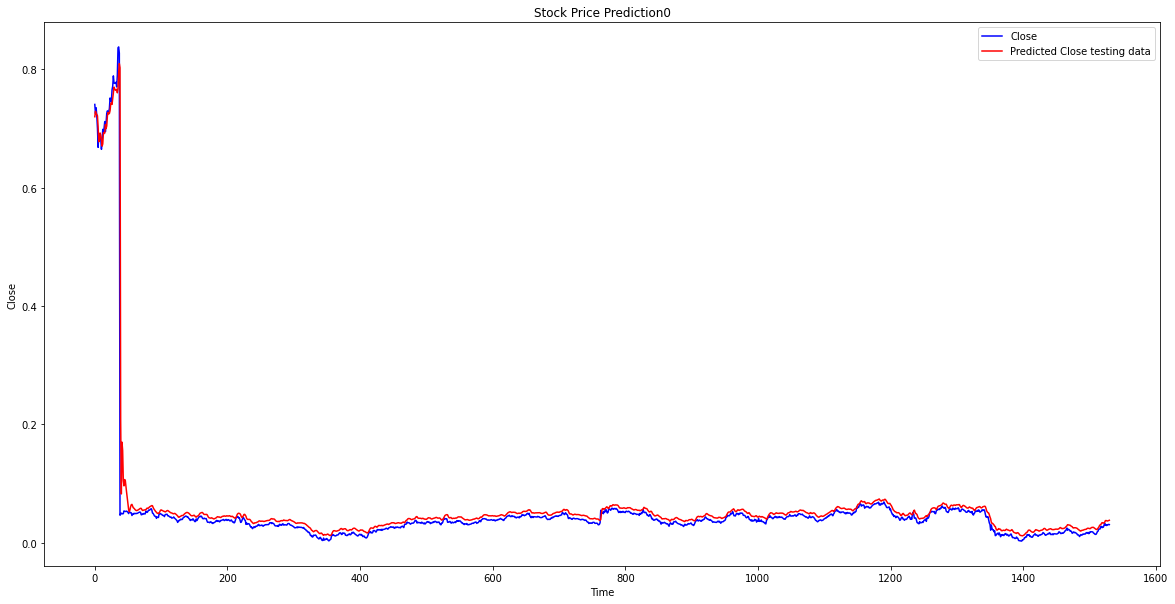

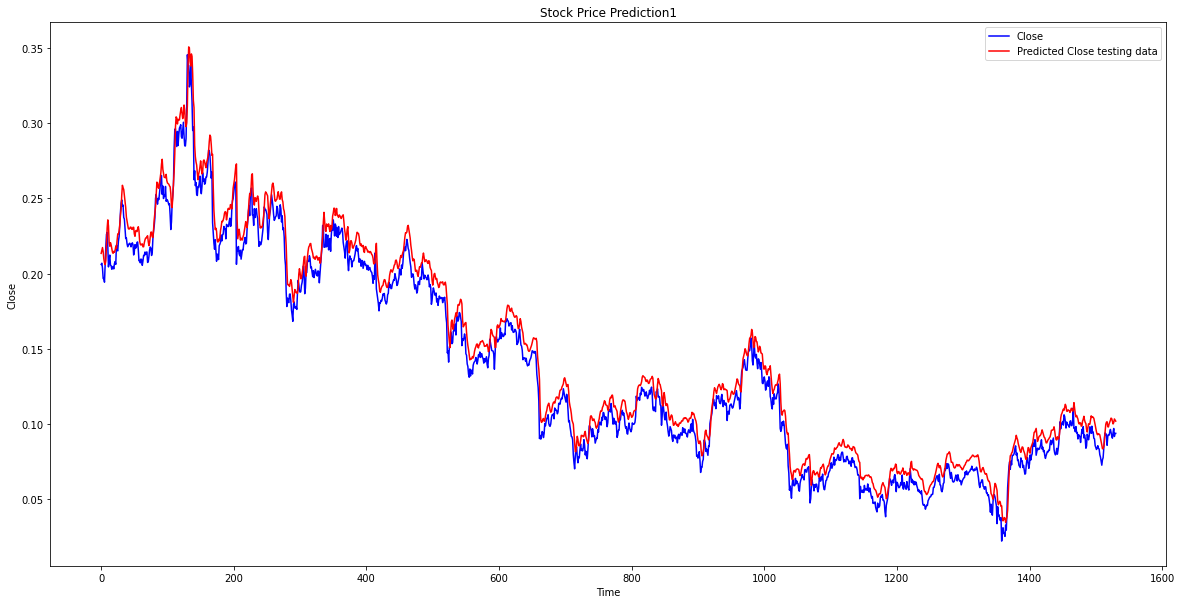

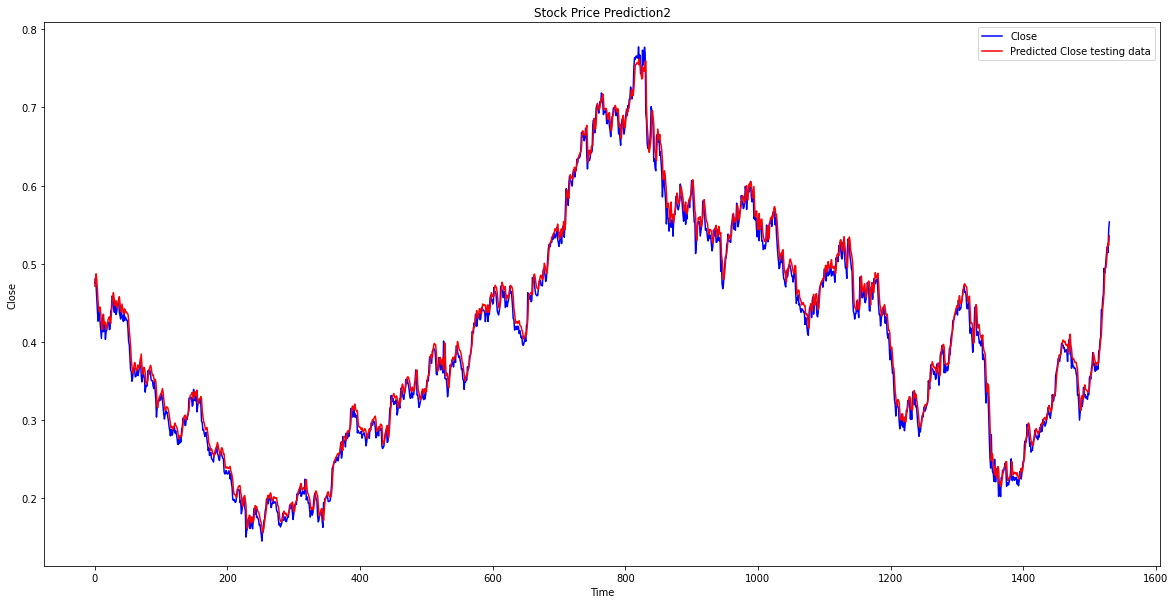

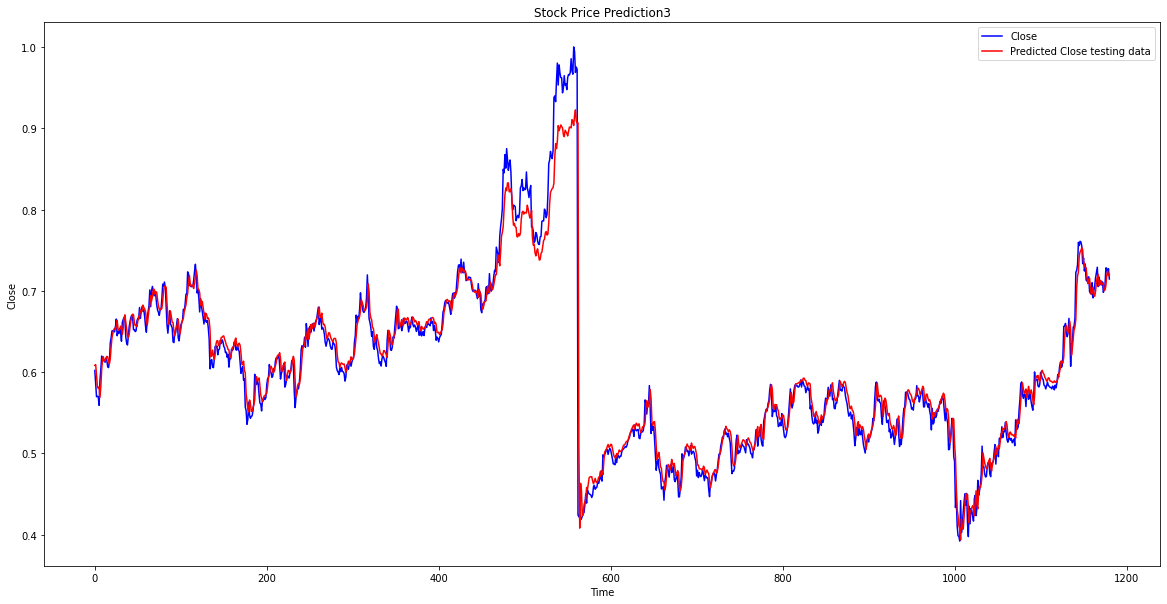

In [62]:
for i in range(4):
  plt.plot(real_close_value_test[i], color = 'blue', label = 'Close')
  plt.plot(predicted_close_value_test[i],  color = 'red', label = 'Predicted Close testing data')
  # print("train accuracy: {} %".format(100 - np.mean((np.abs(predicted_close_value_train[i] - real_close_value_train[i]))/real_close_value_train[i])*100))   
  plt.title('Stock Price Prediction'+str(i))
  plt.xlabel('Time')
  plt.ylabel('Close')
  plt.legend()
  plt.show()
